<a href="https://colab.research.google.com/github/Sj3604/Data-Science-Projects-/blob/main/Blinkit_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_excel("/content/Tableau BlinkIT Grocery Project U16955293080 (4).xlsx")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
  Item_Identifier  Item_Weight Item_Fat_

In [ ]:
print(df.Outlet_Type.value_counts())


Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64


Let's analyze the sales based on the `Outlet_Type`. We can group the DataFrame by `Outlet_Type` and calculate the average `Item_Outlet_Sales` for each type.

In [ ]:
outlet_type_sales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
print("Average Item Outlet Sales by Outlet Type:")
print(outlet_type_sales)

Average Item Outlet Sales by Outlet Type:
Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64


In [ ]:
tier_price_sales = df.groupby(['Outlet_Location_Type', 'Item_MRP'])['Item_Outlet_Sales'].mean()
print("Average Item Outlet Sales by Outlet Location Type and Item MRP:")
print(tier_price_sales)

Average Item Outlet Sales by Outlet Location Type and Item MRP:
Outlet_Location_Type  Item_MRP
Tier 1                32.4558      101.8674
                      32.4900      865.5400
                      32.8558      645.1602
                      32.9216      588.5672
                      33.1216      623.1888
                                    ...    
Tier 3                265.1568    2109.2544
                      265.1884    5697.2506
                      265.2884    1722.4246
                      266.1884    5299.7680
                      266.6884    2119.9072
Name: Item_Outlet_Sales, Length: 7516, dtype: float64


Let's filter the data to include only items with 'Low Fat' content and then count the number of low-fat items sold by each outlet.

In [ ]:
low_fat_items_df = df[df['Item_Fat_Content'] == 'Low Fat']
outlet_low_fat_counts = low_fat_items_df['Outlet_Identifier'].value_counts()

print("Number of Low Fat items sold by each outlet:")
print(outlet_low_fat_counts)

Number of Low Fat items sold by each outlet:
Outlet_Identifier
OUT045    570
OUT049    560
OUT035    559
OUT013    556
OUT027    553
OUT046    552
OUT017    550
OUT018    547
OUT010    328
OUT019    314
Name: count, dtype: int64


Let's analyze the effect of store location on sales by grouping by `Outlet_Location_Type` and calculating the average `Item_Outlet_Sales`.

In [ ]:
location_sales = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
print("Average Item Outlet Sales by Outlet Location Type:")
print(location_sales)

Average Item Outlet Sales by Outlet Location Type:
Outlet_Location_Type
Tier 2    2323.990559
Tier 3    2279.627651
Tier 1    1876.909159
Name: Item_Outlet_Sales, dtype: float64


Now, let's visualize the average sales by `Outlet_Location_Type` using a bar plot.

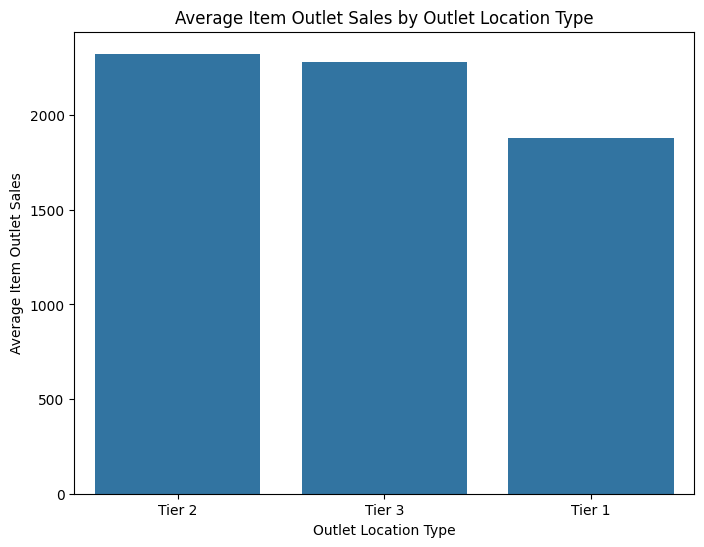

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=location_sales.index, y=location_sales.values)
plt.title('Average Item Outlet Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Average Item Outlet Sales')
plt.show()

**Analysis:**

Based on the average item outlet sales by Outlet Location Type, **Tier 2** locations show the highest average sales, followed by Tier 3 and then Tier 1. This suggests that the location of a store does have an effect on its sales performance, with stores in Tier 2 locations performing the best on average in this dataset.

Let's find out which item type is sold the most by counting the occurrences of each `Item_Type`.

In [ ]:
item_type_counts = df['Item_Type'].value_counts()
print("Most sold Item Types:")
print(item_type_counts)

Most sold Item Types:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


**Analysis:**

Based on the count of item types sold, 'Fruits and Vegetables' is the most sold item type by Blinkit.

Let's analyze if the outlet establishment year has any relationship with the item outlet sales by grouping by `Outlet_Establishment_Year` and calculating the average `Item_Outlet_Sales`.

In [ ]:
establishment_year_sales = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().sort_index()
print("Average Item Outlet Sales by Outlet Establishment Year:")
print(establishment_year_sales)

Average Item Outlet Sales by Outlet Establishment Year:
Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64


**Observation:**

From the average item outlet sales by Outlet Establishment Year, we can see that the stores opened in 2007 have almost the same average sales as those opened in 1985.

**Overall Analysis Summary:**

*   **Sales Performance by Outlet Type:** We found that 'Supermarket Type3' outlets have the highest average sales, while 'Grocery Stores' have the lowest. This indicates that the type of store significantly impacts sales.
*   **Sales Performance by Outlet Location:** The analysis showed that 'Tier 2' locations have the highest average sales, closely followed by 'Tier 3', and then 'Tier 1'. This suggests that the geographical location also plays a role in sales performance.
*   **Most Sold Item Types:** 'Fruits and Vegetables' and 'Snack Foods' are the most frequently sold item types in this dataset.
*   **Sales by Establishment Year:** We observed variations in average sales based on the outlet establishment year, with some years showing higher average sales than others. Notably, stores opened in 2007 had average sales similar to those opened in 1985.
*   **Low Fat Item Sales:** We identified that Outlet OUT045 sells the highest number of low-fat items.

**Feedback and Potential Improvements/Further Analysis:**

*   **Deeper Dive into Outlet Types:** While we found average sales by outlet type, you could explore the reasons behind the differences. For example, do Supermarket Type3 stores have specific characteristics (like size, location, or item variety) that contribute to their high sales?
*   **Impact of Item Characteristics on Sales:** We looked at item types and fat content, but you could analyze how `Item_Weight`, `Item_Visibility`, and `Item_MRP` influence sales. For instance, are higher-priced items selling better in certain outlets or locations?
*   **Handling Missing Values:** The initial data info showed missing values in 'Item\_Weight' and 'Outlet\_Size'. Addressing these missing values (e.g., by imputation or removal) could improve the accuracy of analyses.
*   **Visualize Relationships:** We created a bar plot for location type sales, but visualizing other relationships (like establishment year vs. sales, or item type vs. sales) can reveal more insights. Scatter plots, box plots, or line plots could be useful.
*   **Feature Engineering:** You could create new features that might be useful for analysis or modeling, such as the age of the outlet (current year - establishment year).
*   **Predictive Modeling:** Based on the insights gained, you could build a predictive model to forecast `Item_Outlet_Sales` based on various item and outlet characteristics. This could help in identifying factors that drive sales and making informed business decisions.
*   **Analyze Outlet Size:** Investigate the impact of 'Outlet\_Size' on sales, considering the missing values in this column.